# import necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

# load dataset

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df = df[['v1', 'v2']]

In [3]:
df.columns = ['labels', 'texts']

In [4]:
df['spam'] = df['labels'].map({'ham': 0, 'spam': 1})
texts = df['texts'].values
labels = df['spam'].values

In [5]:
maxLength = max(map(lambda x: len(x), texts))
maxLength

910

# make tokenizer

In [6]:
maxWordInSeq = 1000
embedDim = 100

In [7]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(texts)
sequence = tokenizer.texts_to_sequences(texts)

In [8]:
word2Index = tokenizer.word_index
numWord = len(word2Index)
print(f'the total of unique tokens are {numWord}')

the total of unique tokens are 8920


# split datasets

In [9]:
data = keras.utils.pad_sequences(sequences=sequence, maxlen=maxWordInSeq, padding='post', truncating='post')
xTrain, xTest, yTrain, yTest = train_test_split(data, labels, train_size=0.8, random_state=42, stratify=labels)

# build algorithm

In [10]:
inputSeq = keras.layers.Input(shape=[maxWordInSeq, ], dtype='int32')
embedSeq = keras.layers.Embedding(numWord+1, embedDim, input_length=maxWordInSeq)(inputSeq)

conv_1 = keras.layers.Conv1D(32, 3, activation=keras.activations.relu)(embedSeq)
conv_1 = keras.layers.MaxPooling1D(pool_size=3)(conv_1)
conv_2 = keras.layers.Conv1D(64, 3, activation=keras.activations.relu)(conv_1)
conv_2 = keras.layers.MaxPooling1D(pool_size=3)(conv_2)
conv_3 = keras.layers.Conv1D(128, 3, activation=keras.activations.relu)(conv_2)
conv_3 = keras.layers.MaxPooling1D(pool_size=3)(conv_3)
flat = keras.layers.Flatten()(conv_3)
dense_flat = keras.layers.Dense(128, activation=keras.activations.relu)(flat)
dense = keras.layers.Dense(1, activation=keras.activations.sigmoid)(dense_flat)

model = keras.models.Model(inputSeq, dense)
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=keras.metrics.Accuracy())

In [11]:
model.fit(x=xTrain, y=yTrain, epochs=10, validation_data=[xTest, yTest])

Epoch 1/10
140/140 [==============================] - 24s 146ms/step - loss: 0.2690 - accuracy: 0.0000e+00 - val_loss: 0.0531 - val_accuracy: 0.0000e+00
Epoch 2/10
140/140 [==============================] - 19s 137ms/step - loss: 0.0328 - accuracy: 0.0000e+00 - val_loss: 0.0471 - val_accuracy: 0.0000e+00
Epoch 3/10
140/140 [==============================] - 19s 137ms/step - loss: 0.0064 - accuracy: 0.0000e+00 - val_loss: 0.0609 - val_accuracy: 0.0000e+00
Epoch 4/10
140/140 [==============================] - 18s 129ms/step - loss: 0.0018 - accuracy: 0.0000e+00 - val_loss: 0.0722 - val_accuracy: 0.0000e+00
Epoch 5/10
140/140 [==============================] - 18s 126ms/step - loss: 1.8502e-04 - accuracy: 2.2437e-04 - val_loss: 0.0819 - val_accuracy: 0.0000e+00
Epoch 6/10
140/140 [==============================] - 18s 127ms/step - loss: 2.4132e-05 - accuracy: 0.0013 - val_loss: 0.0937 - val_accuracy: 0.0000e+00
Epoch 7/10
140/140 [==============================] - 18s 125ms/step - loss: 1

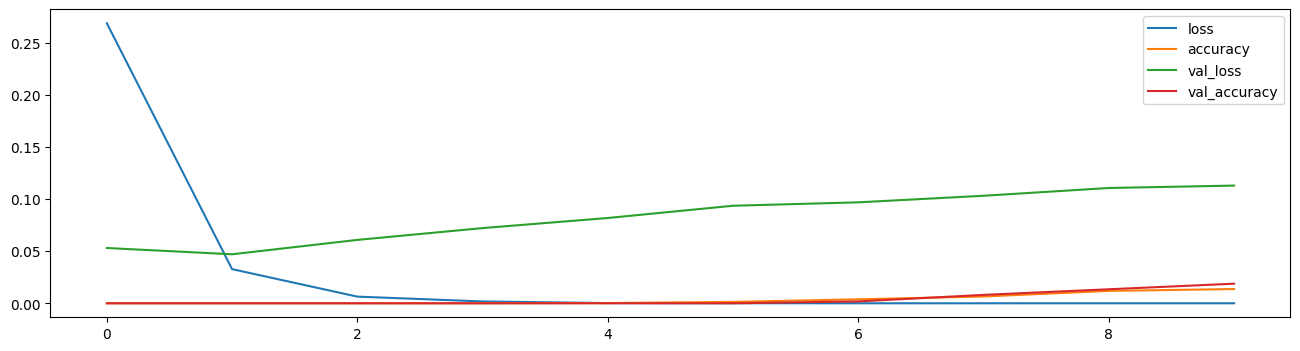

In [12]:
pd.DataFrame(model.history.history).plot(figsize=(16, 4))
plt.show()

In [13]:
prediction = (model.predict(xTest)).round()

35/35 [==============================] - 1s 29ms/step


# model evaluation

In [14]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [15]:
print(classification_report(yTest, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.93      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



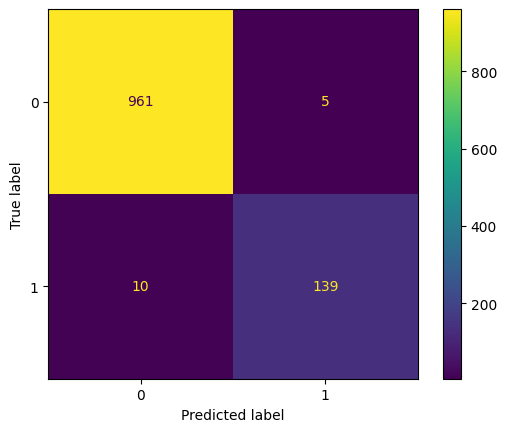

In [16]:
ConfusionMatrixDisplay.from_predictions(yTest, prediction)
plt.show()